# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
import glob
path1 = glob.glob('./Reacher_v1/**/Reacher.exe', recursive=True)[0]
path2 = glob.glob('./Reacher_v2/**/Reacher.exe', recursive=True)[0]

In [3]:
env = UnityEnvironment(file_name=path2)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)
step_nbr = 0
all_states  = [states]
# initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states
    all_states.append(states)
    step_nbr += 1
    # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
print("Nbr of step for this episode: {}".format(step_nbr))

Total score (averaged over agents) this episode: 0.10199999772012233
Nbr of step for this episode: 1001


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

I have implemented 2 kinds of actor-critic model:
* **DDPG**
* **PPO A2C style**

In [6]:
import torch
from DDPGAgent import DDPG
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## DDPG

DDPG is **off-policy and uses a deterministic target policy**, this allows for the use of the Deterministic Policy Gradient theorem (which will be derived shortly). DDPG is an actor-critic algorithm as well; it primarily uses two neural networks, one for the actor and one for the critic. These networks compute action predictions for the current state and generate a temporal-difference (TD) error signal each time step. The input of the actor network is the current state, and the output is a single real value representing an action chosen from a **continuous** action space. The critic’s output is simply the estimated Q-value of the current state and of the action given by the actor. The deterministic policy gradient theorem provides the update rule for the weights of the actor network. The critic network is updated from the gradients obtained from the TD error signal.

![model](image/1anuwZULjg0VziHEQp7UgIQ.png)

![DPG](image/DPG.png)

We need to use like for DQN:
1. **Experience Replay**. It is highly suggested to use a replay buffer to store the **experiences** of the agent during training, and then randomly sample experiences to use for learning in order to break up the temporal correlations within different training episodes.
2. **target networks** Directly updating your actor and critic neural network weights with the gradients obtained from the TD error signal that was computed from both your replay buffer and the output of the actor and critic networks causes your learning algorithm to diverge (or to not learn at all). It was recently discovered that using a set of **target networks** to generate the **targets** for your TD error computation regularizes your learning algorithm and increases stability.

![algo](image/v2-0c2fdf2104efaab544799526b6b28383_hd.png)

### Exploration Noise

We compare the performance of the following configurations: 
* uncorrelated additive Gaussian **action space noise**,
* correlated additive Gaussian **action space noise** (**Ornstein–Uhlenbeck process** (Uhlenbeck & Ornstein, 1930),
* **adaptive parameter space noise**. In the case of parameter space noise, we **adapt** the scale so that the resultingchange in action space is comparable to our baselines with uncorrelated Gaussian action space noise.

![ddpg2](image/p_diag_1.png)

### Normalization

In order to avoid learning bias, we implement:
* **State normalization**
* **Reward Normalization**, only during the learning part (Score during evaluation or after learning is the real scoring).

Normalizations are Running Normalization. Mean and std are calculated online.
    

#### Hyperparameter
* Policy Network: (64, relu, 64, relu, tanh); Q Network (128, relu, 64, relu, linear)
* Normalized observations with running mean filter, Normalized rewards with runing mean Filter
* Actor LR: 1e-4; Critic LR: 5e-4
* Soft target update τ:.001
* γ: 0,99
* batch size = 64
* Critic L2 reg = 1e-4
* Referance noise: 0.2

#### Uncorelated action Noise

In [9]:
%%time
agent = DDPG(env,state_size=state_size, action_size=action_size, seed=0, device=device,
             fc_units_act=(64, 64), fc_units_critic=(128,64), parameter_noise=False, correlated_action_noise = False)
scores, scores_avg = agent.learn(n_episodes=250, max_t=1002)

Episode 250	Average Score: 38.46Wall time: 1h 47min 20s


#### Corelated Action Noise

In [10]:
%%time
agent = DDPG(env,state_size=state_size, action_size=action_size, seed=0, device=device,
             fc_units_act=(64, 64), fc_units_critic=(128,64), parameter_noise=False, correlated_action_noise = True)
scores2, scores_avg2 = agent.learn(n_episodes=250, max_t=1002)

Episode 250	Average Score: 39.36Wall time: 1h 48min 10s


#### Adaptative Parameter Space Noise

In [11]:
%%time
agent = DDPG(env,state_size=state_size, action_size=action_size, seed=0, device=device,
             fc_units_act=(64, 64), fc_units_critic=(128,64), parameter_noise=True)
scores3, scores_avg3 = agent.learn(n_episodes=250, max_t=1002)

Episode 250	Average Score: 37.32Wall time: 1h 48min 36s


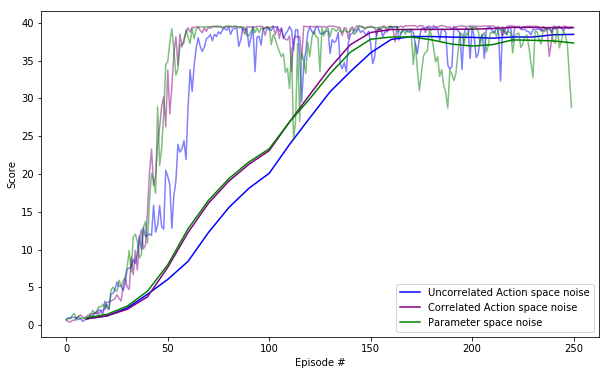

In [12]:
# plot the scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, alpha=0.5, color = 'blue')
plt.plot(np.append(np.arange(1,len(scores_avg))*10 ,len(scores)), scores_avg, color = 'blue',
         label='Uncorrelated Action space noise')
plt.plot(np.arange(len(scores2)), scores2, alpha=0.5, color = 'purple')
plt.plot(np.append(np.arange(1,len(scores_avg2))*10 ,len(scores2)), scores_avg2, color = 'purple',
         label='Correlated Action space noise')
plt.plot(np.arange(len(scores3)), scores3, alpha=0.5, color = 'green')
plt.plot(np.append(np.arange(1,len(scores_avg3))*10 ,len(scores3)), scores_avg3, color = 'green',
         label='Parameter space noise')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

The bold  lines are the average over 100 episodes.

Here the 3 solutions resolve the problem, but correlated action noise seems to be more stable and efficient.
We will save the model  with correlated action noise below.

In [9]:
agent = DDPG(env,state_size=state_size, action_size=action_size, seed=0, device=device,
            fc_units_act=(64, 64), fc_units_critic=(128,64), parameter_noise=False, correlated_action_noise = True)

In [9]:
_, _ = agent.learn(n_episodes=500, max_t=1002, save=True, target=37.5)

Episode 153	Average Score: 37.66
Environment solved in 53 episodes!	Average Score: 37.66


In [10]:
playscores = agent.play()

saved model file has been found and loaded


Play after learning:
![DDPGDisplay](image/DDPGdisplay.gif)

Score of the 20 agents after learning :

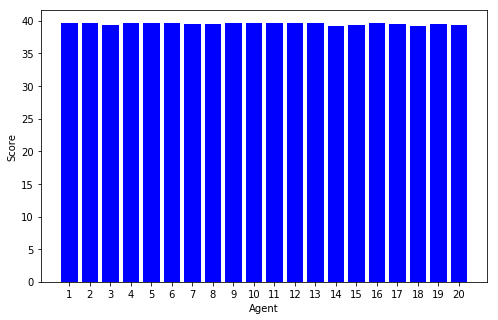

In [21]:
fig = plt.figure(figsize=(8,5))
plt.bar(np.arange(agent.num_agents), playscores, tick_label=np.arange(agent.num_agents)+1, color='blue')
plt.ylabel('Score')
plt.xlabel('Agent')
plt.show()

## PPO Proximal Policy Optimization

Proximal Policy Optimization is **On-policy**, or exactly learn from the last trajectories.
It adopts the **actor-critic architecture**, but modifies how the policy parameters of the actor are updated. Policy gradients methods maximize the expected total reward by repeatedly estimating the gradient.

Proximal policy trick come from: if the old and current policy is close enough to each other, all the factors to calculate the trajectories (according to past states and future states) would be pretty close to 1, and then we can ignore them.


![surogate](image/surogate.png)

Finally, the discounted approximation to the policy gradient is defined as follows:

![equation](image/equa.png)

There one issue that could happen. If we keep reusing old trajectories and updating our policy, at some point the new policy might become different enough from the old one, so that all the approximations we made could become invalid. 

For this issue, PPO uses cliped surogate Loss: 

![PPO](image/math_PPO_5-1.png)

![formula](image/1cz0tz14llIU-qimXzvmf4g.png)

where c1, c2 are coefficients, and S denotes an entropy bonus to ensure suffisent exploration, and LVF is a squared-error loss (V(st) − V target )2.

#### GENERALIZED ADVANTAGE ESTIMATION - GAE

We will implement GAE, to potentially increase the efficient for some case.

In [11]:
from PPOAgent import PPOAgent

#### Hyperparameter
* Policy Network: (64, relu, 64, relu, tanh); Q Network (128, relu, 64, relu, linear)
* Normalized observations with running mean filter, Normalized rewards with runing mean Filter
* LR: 5e-4
* γ: 0,99
* PPO ε: 0.2
* Entropy weight: 0.01
* VF coefficient: 0.1
* Gradient clip: 0.5
* λ GAE coefficient: 0.7
* batch size = 64

#### Without GAE

In [10]:
agent2 = PPOAgent(env, state_size=state_size, action_size=action_size, seed=0, device=device,
                  fc_units_actor=(64, 64), fc_units_critic=(128, 64))

In [20]:
%%time
scores4, scores_avg4 = agent2.learn(n_episodes=250, max_t=1002, use_gae = False)

Episode 250	Average Score: 26.26Wall time: 1h 53min 21s


#### With GAE

In [12]:
agent2 = PPOAgent(env, state_size=state_size, action_size=action_size, seed=0, device=device, 
                  fc_units_actor=(64, 64), fc_units_critic=(128, 64))

In [11]:
%%time
scores5, scores_avg5 = agent2.learn(n_episodes=250, max_t=1002, use_gae = True)

Episode 250	Average Score: 38.78Wall time: 1h 44s


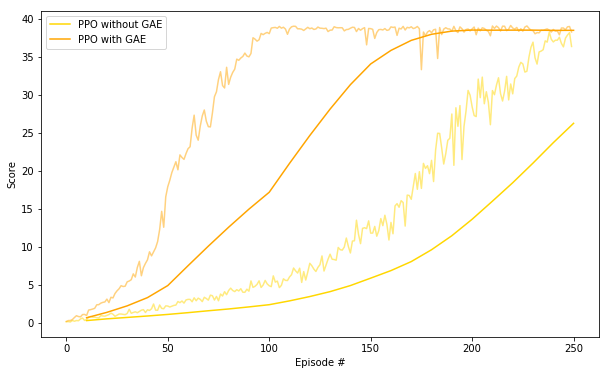

In [26]:
# plot the scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores4)), scores4, alpha=0.5, color = 'gold')
plt.plot(np.append(np.arange(1,len(scores_avg4))*10 ,len(scores4)), scores_avg4, color = 'gold', label='PPO without GAE')
plt.plot(np.arange(len(scores5)), scores5, alpha=0.5, color = 'orange')
plt.plot(np.append(np.arange(1,len(scores_avg5))*10 ,len(scores5)), scores_avg5, color = 'orange', label='PPO with GAE')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

In [12]:
_, _ = agent2.learn(n_episodes=500, max_t=1002, save=True, target=37.5, use_gae = True)

Episode 1	Average Score: 38.83
Environment solved in -99 episodes!	Average Score: 38.83


After learning: 

In [13]:
playscores = agent2.play()

saved model file has been found and loaded


![PPODisplay](image/PPODisplay.gif)

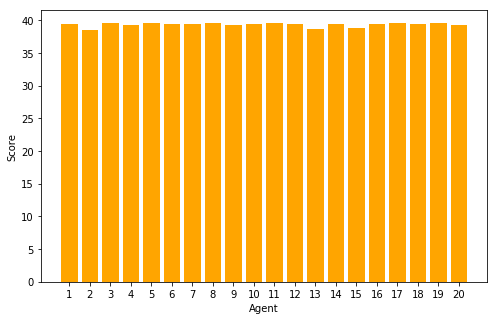

In [12]:
fig = plt.figure(figsize=(8,5))
plt.bar(np.arange(agent2.num_agents), playscores, tick_label=np.arange(agent2.num_agents)+1, color='orange')
plt.ylabel('Score')
plt.xlabel('Agent')
plt.show()

## Comparaison

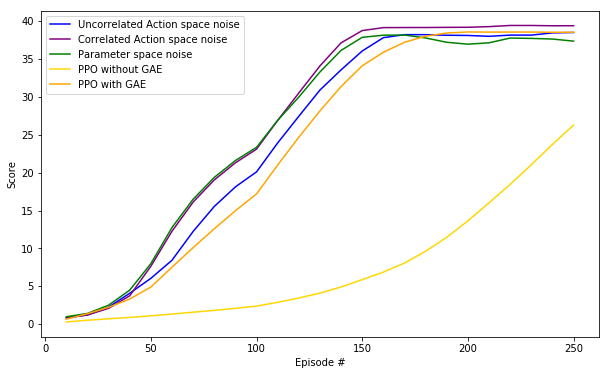

In [30]:
# plot the scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(np.append(np.arange(1,len(scores_avg))*10 ,len(scores)), scores_avg, color = 'blue',
         label='Uncorrelated Action space noise')
plt.plot(np.append(np.arange(1,len(scores_avg2))*10 ,len(scores2)), scores_avg2, color = 'purple',
         label='Correlated Action space noise')
plt.plot(np.append(np.arange(1,len(scores_avg3))*10 ,len(scores3)), scores_avg3, color = 'green',
         label='Parameter space noise')
plt.plot(np.append(np.arange(1,len(scores_avg4))*10 ,len(scores4)), scores_avg4, color = 'gold', label='PPO without GAE')
plt.plot(np.append(np.arange(1,len(scores_avg5))*10 ,len(scores5)), scores_avg5, color = 'orange', label='PPO with GAE')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

Here, for this environment, better solution seams to be DDPG - Correlated Action space noise !!
However the other solutions resolve the problem.

The threshold to 30 to validate the project is globaly reached.

When finished, you can close the environment.

In [14]:
env.close()

## Challenge environment - Crawler

Crawler environement is more complex because of number of action space, bcause walking is a complex interactive task, and beacause episode stop when the Crawler falls on the ground. Episode have different size of trajectory.

It will be better for this environment:
* to update the network one time at every time step (rather than several after a set of step).
* to initialize the last layer of actor network with small value close to zero.
* decrease the discount coefficient.
* increase the τ value

#### Hyperparameter
* Policy Network: (256, relu, 256, relu, tanh); Q Network (256, relu, 256, relu, , 128, relu, linear)
* Normalized observations with running mean filter, Normalized rewards with runing mean Filter
* Actor LR: 1e-4; Critic LR: 1e-3
* Soft target update τ:.01
* γ: 0,9
* batch size = 64
* Critic L2 reg = 0
* Reference noise: 0.2

After 4000 episodes, we obtain this results:

![Crawler](image/Crawler.png)

After 10000 episodes, we obtain a jumping crawler.

![Result](image/Crawler.gif)

**Way to improve**:
* Try other size of networks
* Increase the batch size
* Increase the discount reward coeff to limit the kamikaze behavior of the crawler. 

## Source


[ShangtongZhang github](https://github.com/ShangtongZhang)

[OpenAI github](https://github.com/openai/baselines/tree/master/baselines)

[DDPG Paper](https://arxiv.org/pdf/1509.02971.pdf)

[Parameter Noise article](https://blog.openai.com/better-exploration-with-parameter-noise/)


[Proximal Policy Optimization Algorithms paper](https://arxiv.org/pdf/1707.06347.pdf)

[Introduction to Various Reinforcement Learning Algorithms. Part II (TRPO, PPO) (Article)](https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-part-ii-trpo-ppo-87f2c5919bb9)

[High-Dimensional Continuous Control Using Generalized Advantage Estimation paper](https://arxiv.org/pdf/1506.02438.pdf)